# SQLAlchemy (Structured Query Language)

## Create sql engine from a file (on hard drive)

In [1]:
import pandas as pd
import sqlalchemy as db

# File name full path
sql_filename = '/home/ilves/Documents/jupyter_anaconda/sqlite_files/chinook_db/chinook.db'

# Creating engine
engine = db.create_engine('sqlite:///' + sql_filename)
#                   driver+dialect       filename

# creating connection
connection = engine.connect()

# to get the list of tables that the database holds one does not need to connect to the 
# engine to get the table names
print(engine.table_names())

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


### DB Structure Image

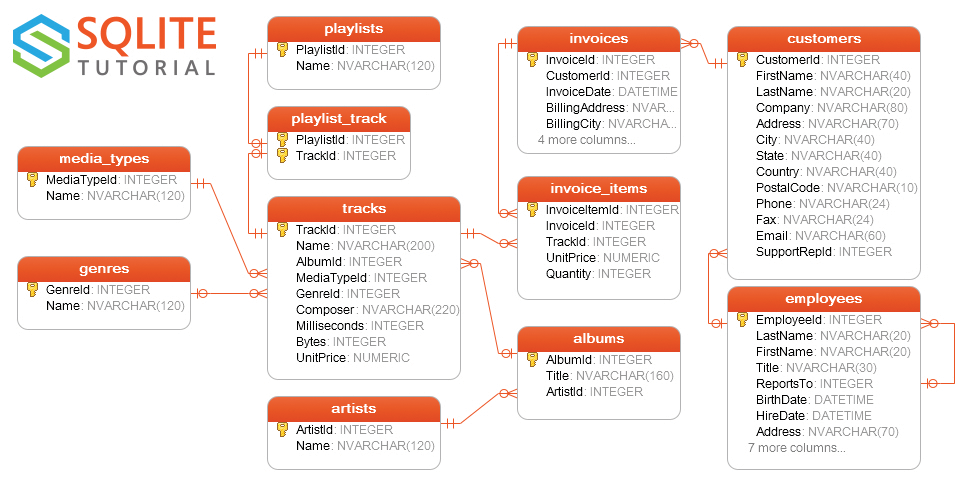

In [8]:
from IPython.display import Image
path = '/home/ilves/Documents/jupyter_anaconda/sqlite_files/chinook_db/chinook_dia.png'
Image(path)

### Refloction - accessing tables with Python

In [9]:
# creating a MetaData object
metadata = db.MetaData()

# creating a Table object
alb_obj = db.Table('albums', metadata, autoload=True, autoload_with=engine)

# Print the column names
print(alb_obj.columns.keys())

['AlbumId', 'Title', 'ArtistId']


In [10]:
# Print full table metadata
print(repr(metadata.tables['albums']))

Table('albums', MetaData(bind=None), Column('AlbumId', INTEGER(), table=<albums>, primary_key=True, nullable=False), Column('Title', NVARCHAR(length=160), table=<albums>, nullable=False), Column('ArtistId', INTEGER(), ForeignKey('artists.ArtistId'), table=<albums>, nullable=False), schema=None)


In [15]:
#Equivalent to 'SELECT * FROM albums'
query = db.select([alb_obj])

# creating the ResultProxy object
ResultProxy = connection.execute(query)

# creating a list of tuples of the querry
result_list = ResultProxy.fetchall()

result_list[:3]

[(1, 'For Those About To Rock We Salute You', 1),
 (2, 'Balls to the Wall', 2),
 (3, 'Restless and Wild', 2)]

### Reading sql DB Tables into DF

In [16]:
print(engine.table_names())

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


In [17]:
# creating a MetaData object
metadata = db.MetaData()

# creating a Table object
alb_obj = db.Table('albums', metadata, autoload=True, autoload_with=engine)

# Print the column names
print(alb_obj.columns.keys())

['AlbumId', 'Title', 'ArtistId']


In [18]:
albums_df = pd.read_sql('select * from albums', engine, index_col='AlbumId')
albums_df.head(3)

,Title,ArtistId
AlbumId,,
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2
